# Importing libraries and datasets

In [206]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [366]:
df1=pd.read_csv('drinks.csv')
df2=pd.read_csv('PopulationDataset.csV')
df3 = pd.read_csv('economic_freedom_index2019_data.csv', encoding='latin1')

In [367]:
df1.rename(columns={'country': 'Country'}, inplace=True)
df1.head()


,Country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [368]:
df2 = df2[df2['Year'] == '2023']
df2.head()



,Country,Year,Population,Yearly %,Change Yearly,Change Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Country's Global Rank
1,India,2023,"1,428,627,663",0.81 %,"11,454,490","-486,136",28.2,2.00,481,36.3 %,"518,239,122",17.76 %,"8,045,311,447",1.0
18,China,2023,"1,425,671,352",-0.02 %,"-215,985","-310,220",39.0,1.19,152,65.0 %,"926,375,811",17.72 %,"8,045,311,447",2.0
35,the United States of America,2023,"339,996,563",0.50 %,"1,706,706","999,700",38.1,1.66,37,82.9 %,"281,984,165",4.23 %,"8,045,311,447",3.0
52,Indonesia,2023,"277,534,122",0.74 %,"2,032,783","-49,997",29.9,2.13,153,59.1 %,"163,963,233",3.45 %,"8,045,311,447",4.0
69,Pakistan,2023,"240,485,658",1.98 %,"4,660,796","-165,988",20.6,3.35,312,34.7 %,"83,500,516",2.99 %,"8,045,311,447",5.0


In [369]:
# Select rows where 'Year' column is '2023'
df2 = df2[df2['Year'] == '2023']

# Find numerical columns
numerical_columns = df2.select_dtypes(include=np.number).columns

from sklearn.impute import SimpleImputer


# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
df2[numerical_columns] = imputer.fit_transform(df2[numerical_columns])

# Define the columns to convert to numeric
columns_to_convert = ['Year', 'Population', 'Yearly %', 'Change Yearly', 'Change Migrants (net)', 
                      'Median Age', 'Fertility Rate', 'Density (P/Km²)', 'Urban Pop %', 
                      'Urban Population', "Country's Share of World Pop", 'World Population']

# Remove commas from the data
df2[columns_to_convert] = df2[columns_to_convert].replace(',', '', regex=True)

# Convert to numeric
df2[columns_to_convert] = df2[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display updated DataFrame
print(df2.dtypes)




Country                          object
Year                              int64
Population                        int64
Yearly %                        float64
Change Yearly                     int64
Change Migrants (net)             int64
Median Age                      float64
Fertility Rate                  float64
Density (P/Km²)                 float64
Urban Pop %                     float64
Urban Population                float64
Country's Share of World Pop    float64
World Population                float64
Country's Global Rank           float64
dtype: object


In [370]:
df3.head()


,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


# Data preprocessing

In [371]:
from sklearn.impute import SimpleImputer

# Select only numeric columns for imputation
numeric_columns = merged_df.select_dtypes(include=np.number).columns

# Impute missing values in numeric columns of merged_df
imputer_merged = SimpleImputer(strategy='mean')
merged_df[numeric_columns] = imputer_merged.fit_transform(merged_df[numeric_columns])

# Impute missing values in df3
imputer_df3 = SimpleImputer(strategy='mean')
df3_numeric = df3.select_dtypes(include=np.number)  # Select only numeric columns for imputation
df3[df3_numeric.columns] = imputer_df3.fit_transform(df3_numeric)

# Then, merge the imputed DataFrames
final_merged_df = pd.merge(merged_df, df3, on='Country', how='inner')

# Iterate over each column in the DataFrame
for column in final_merged_df.columns:
    # Check if the column contains string values that can be converted to numeric
    if final_merged_df[column].dtype == 'object' and final_merged_df[column].str.isnumeric().any():
        # Convert the string values to numeric data type
        final_merged_df[column] = pd.to_numeric(final_merged_df[column], errors='coerce')


In [372]:
final_merged_df.columns

Index(['Country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'Year', 'Population', 'Yearly %',
       'Change Yearly', 'Change Migrants (net)', 'Median Age',
       'Fertility Rate', 'Density (P/Km²)', 'Urban Pop %', 'Urban Population',
       'Country's Share of World Pop', 'World Population',
       'Country's Global Rank', 'CountryID', 'Country Name', 'WEBNAME',
       'Region', 'World Rank', 'Region Rank', '2019 Score', 'Property Rights',
       'Judical Effectiveness', 'Government Integrity', 'Tax Burden',
       'Gov't Spending', 'Fiscal Health', 'Business Freedom', 'Labor Freedom',
       'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ',
       'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)',
       'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov't Expenditure % of GDP ', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per 

In [373]:
final_merged_df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Year,Change Yearly,Change Migrants (net),Density (P/Km²),Urban Population,Country's Global Rank,...,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%),Public Debt (% of GDP)
count,144.000000,144.000000,144.000000,144.000000,144.0,7.000000,21.000000,138.000000,1.0,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,104.611111,75.381944,52.340278,4.633333,2023.0,284.714286,-32.523810,121.362319,203.0,93.696995,...,49.271793,5.751809,28.640043,23.988767,22.412709,34.155052,3.690278,3.061111,4.992960,59.456036
std,101.944528,80.046140,84.049117,3.769328,0.0,511.713368,479.238732,135.031921,NaN,53.541626,...,18.459850,4.326128,12.863348,8.708996,10.228163,15.464246,6.259542,2.846053,6.081969,35.015782
min,0.000000,0.000000,0.000000,0.000000,2023.0,-597.000000,-850.000000,2.000000,203.0,1.000000,...,10.000000,0.100000,0.000000,0.000000,1.600000,10.600000,-13.800000,-16.100000,-0.900000,0.000000
25%,20.000000,5.750000,1.000000,1.250000,2023.0,72.500000,-200.000000,29.000000,203.0,46.750000,...,37.500000,2.000000,20.000000,20.000000,15.000000,25.600000,1.975000,2.000000,1.300000,36.475000
50%,66.500000,56.500000,8.000000,4.200000,2023.0,360.000000,0.000000,80.000000,203.0,93.500000,...,50.000000,4.450000,30.000000,25.000000,20.750000,32.350000,3.150000,3.200000,2.950000,52.650000
75%,170.000000,117.000000,59.000000,7.200000,2023.0,585.000000,97.000000,147.000000,203.0,139.250000,...,60.000000,8.700000,35.000000,30.000000,29.450000,40.325000,4.800000,4.425000,5.775000,71.425000
max,376.000000,373.000000,370.000000,14.400000,2023.0,915.000000,900.000000,656.000000,203.0,196.000000,...,90.000000,18.600000,57.000000,50.000000,47.000000,139.200000,70.800000,9.900000,32.400000,236.400000


In [349]:
import pandas as pd

# Define all columns to convert to numeric
all_columns = final_merged_df.drop('Country', axis=1).columns

# Convert all columns to numeric
final_merged_df[all_columns] = final_merged_df[all_columns].apply(pd.to_numeric, errors='coerce')

# Display updated DataFrame data types
print(final_merged_df.columns)


Index(['Country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'Year', 'Population', 'Yearly %',
       'Change Yearly', 'Change Migrants (net)', 'Median Age',
       'Fertility Rate', 'Density (P/Km²)', 'Urban Pop %', 'Urban Population',
       'Country's Share of World Pop', 'World Population',
       'Country's Global Rank', 'CountryID', 'Country Name', 'WEBNAME',
       'Region', 'World Rank', 'Region Rank', '2019 Score', 'Property Rights',
       'Judical Effectiveness', 'Government Integrity', 'Tax Burden',
       'Gov't Spending', 'Fiscal Health', 'Business Freedom', 'Labor Freedom',
       'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ',
       'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)',
       'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov't Expenditure % of GDP ', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per 

# Feature Selection

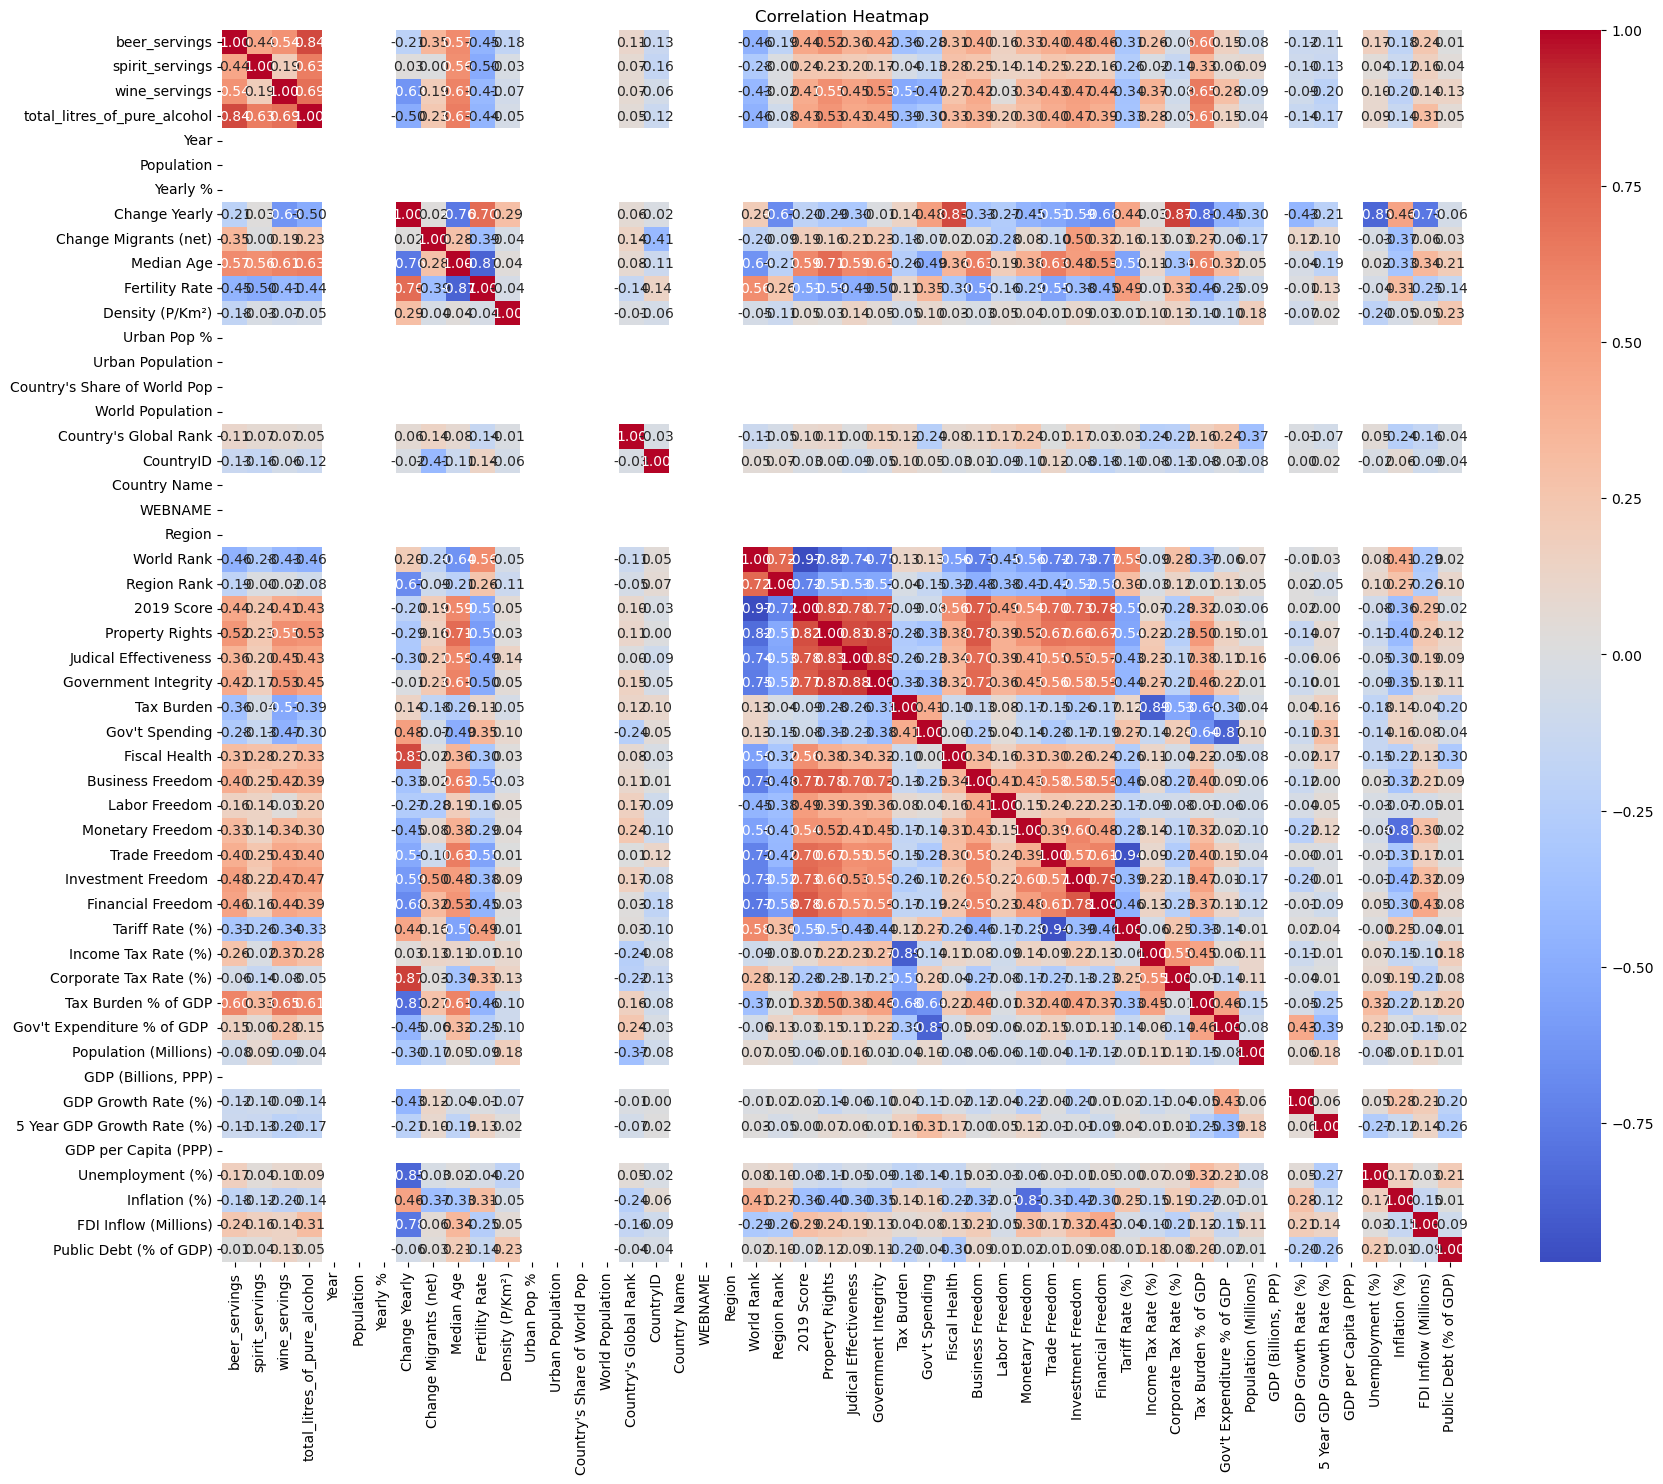

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'final_merged_df' is your DataFrame
# Select only numeric columns
numeric_df = final_merged_df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [218]:
# Select only numeric columns
numeric_df = final_merged_df.select_dtypes(include=['number'])

# Compute correlation coefficients with 'total_litres_of_pure_alcohol'
correlation_with_total_litres = numeric_df.corr()['total_litres_of_pure_alcohol']

# Filter columns with high correlation (e.g., greater than 0.5)
high_correlation_columns = correlation_with_total_litres[(correlation_with_total_litres > 0.35) | (correlation_with_total_litres < -0.35)].index

# Filter columns with low correlation (e.g., less than -0.5)
low_correlation_columns = correlation_with_total_litres[(correlation_with_total_litres < 0.35) & (correlation_with_total_litres > -0.35)].index


# Display columns with high correlation
print("Columns with high correlation:")
print(high_correlation_columns)

# Display columns with low correlation
print("\nColumns with low correlation:")
print(low_correlation_columns)


Columns with high correlation:
Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'Change Yearly', 'Median Age',
       'Fertility Rate', 'World Rank', '2019 Score', 'Property Rights',
       'Judical Effectiveness', 'Government Integrity', 'Tax Burden',
       'Business Freedom', 'Trade Freedom', 'Investment Freedom ',
       'Financial Freedom', 'Tax Burden % of GDP'],
      dtype='object')

Columns with low correlation:
Index(['Change Migrants (net)', 'Density (P/Km²)', 'Country's Global Rank',
       'CountryID', 'Region Rank', 'Gov't Spending', 'Fiscal Health',
       'Labor Freedom', 'Monetary Freedom', 'Tariff Rate (%)',
       'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Gov't Expenditure % of GDP ', 'Population (Millions)',
       'GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'Unemployment (%)',
       'Inflation (%)', 'FDI Inflow (Millions)', 'Public Debt (% of GDP)'],
      dtype='object')


In [219]:
# Specify the list of columns to select
selected_columns = ['Country', 'total_litres_of_pure_alcohol', 'Change Yearly', 'Median Age',
       'Fertility Rate',  '2019 Score', 'Property Rights',
       'Judical Effectiveness', 'Government Integrity', 'Tax Burden',
       'Business Freedom', 'Trade Freedom', 'Investment Freedom ',
       'Financial Freedom', 'Tax Burden % of GDP']
                   

# Create a new DataFrame with selected columns and set the 'Country' column as the index
new_df = final_merged_df.loc[:, selected_columns]
new_df.set_index('Country', inplace=True)


In [220]:
new_df

,total_litres_of_pure_alcohol,Change Yearly,Median Age,Fertility Rate,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Business Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tax Burden % of GDP
Country,,,,,,,,,,,,,,
Afghanistan,0.0,NaN,17.0,4.41,51.500000,19.6,29.6,25.2,91.700000,49.2,66.0,10.0,10.00000,5.000000
Albania,4.9,NaN,37.9,1.37,66.500000,54.8,30.6,40.4,86.300000,69.3,87.8,70.0,70.00000,24.900000
Algeria,0.7,NaN,28.2,2.77,46.200000,31.6,36.2,28.9,76.400000,61.6,67.4,30.0,30.00000,24.500000
Angola,5.9,NaN,16.3,5.12,50.600000,35.9,26.6,20.5,83.900000,55.7,61.2,30.0,40.00000,20.600000
Argentina,8.3,NaN,31.9,1.86,52.200000,47.8,44.5,33.5,69.300000,56.4,70.0,55.0,60.00000,30.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,2.4,NaN,27.0,2.76,53.300000,49.8,34.3,25.2,91.300000,72.5,62.6,10.0,10.00000,18.200000
Vanuatu,0.9,NaN,19.6,3.66,56.400000,65.9,36.4,51.9,97.300000,52.4,64.4,65.0,40.00000,16.300000
Yemen,0.1,NaN,19.0,3.64,60.768333,19.6,22.2,20.3,77.212778,45.1,71.4,50.0,48.78453,22.157542


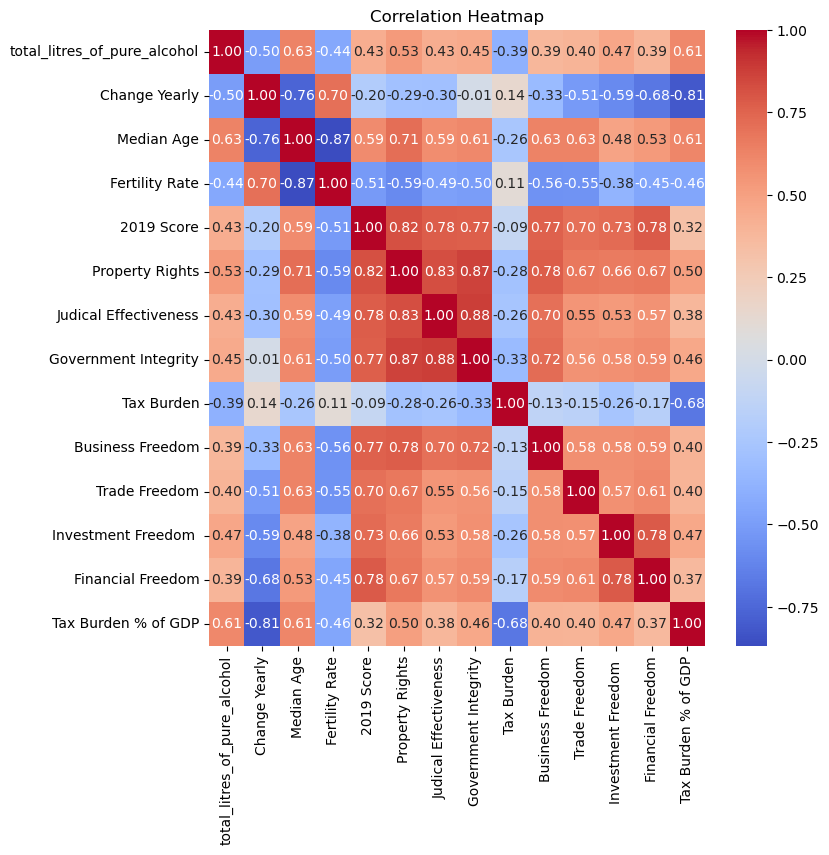

In [221]:
cor=new_df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [222]:
y=new_df['total_litres_of_pure_alcohol']
X = new_df.drop('total_litres_of_pure_alcohol', axis=1)

# Demographic Vs Alcohol Consumption

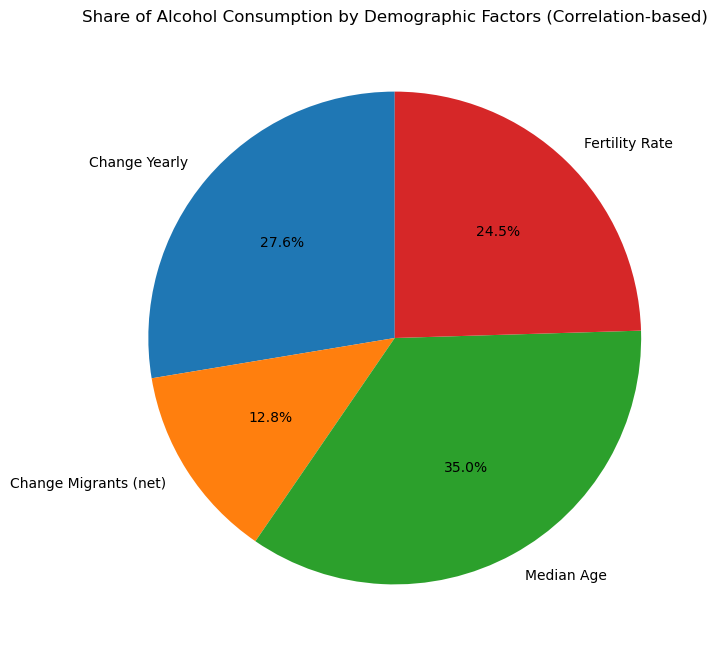

In [239]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = final_merged_df

# Data cleaning and preprocessing (if needed)

# Define financial factors
financial_factors = [
       'Change Yearly', 'Change Migrants (net)', 'Median Age',
       'Fertility Rate', 
  ]

# Calculate correlations between financial factors and alcohol consumption
correlations = data[financial_factors + ['total_litres_of_pure_alcohol']].corr()['total_litres_of_pure_alcohol'].drop('total_litres_of_pure_alcohol')

# Convert negative correlations to positive values
correlations = correlations.abs()

# Plot pie chart showing the share of each financial factor on alcohol consumption based on correlations
plt.figure(figsize=(8, 8))
correlations.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Share of Alcohol Consumption by Demographic Factors (Correlation-based)')
plt.ylabel('')
plt.show()


C:\Users\shami\AppData\Local\Temp\ipykernel_27668\3729909337.py:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\shami\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



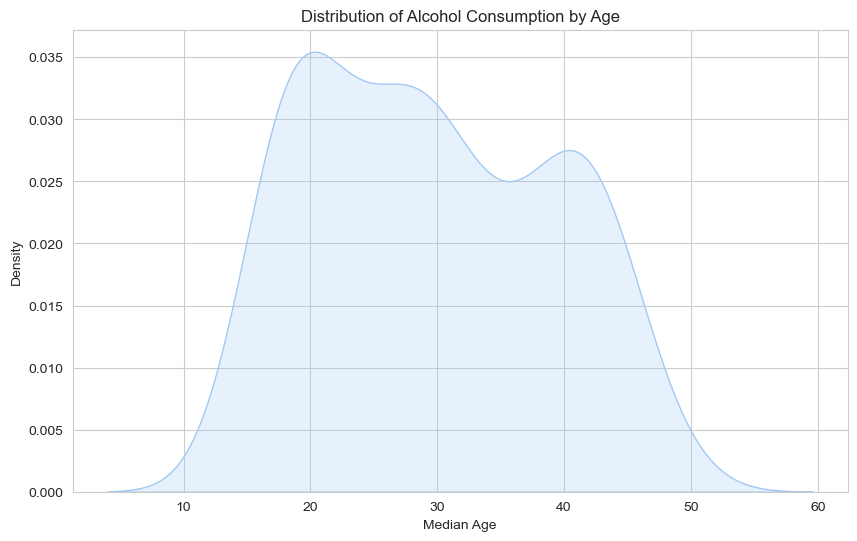

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = final_merged_df

# Plot KDE plot of alcohol consumption for all age groups combined
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Median Age', fill=True, common_norm=False, palette='Set1')
plt.title('Distribution of Alcohol Consumption by Age')
plt.xlabel('Median Age')
plt.ylabel('Density')
plt.show()



C:\Users\shami\AppData\Local\Temp\ipykernel_27668\3416417285.py:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\shami\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



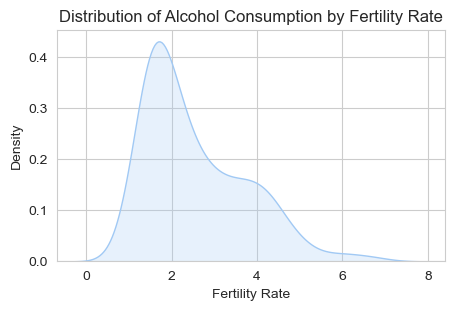

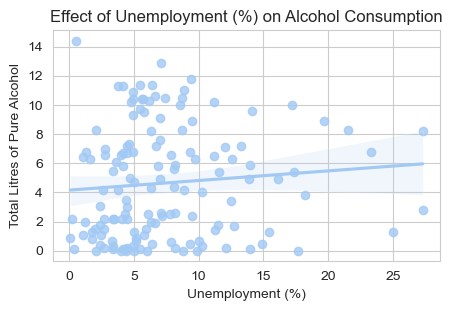

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = final_merged_df

# Plot KDE plot of alcohol consumption for all age groups combined
plt.figure(figsize=(5, 3))
sns.kdeplot(data=data, x='Fertility Rate', fill=True, common_norm=False, palette='Set1')
plt.title('Distribution of Alcohol Consumption by Fertility Rate')
plt.xlabel('Fertility Rate')
plt.ylabel('Density')
plt.show()

# Create a regression plot
plt.figure(figsize=(5, 3))
sns.regplot(data=data, x='Unemployment (%)', y='total_litres_of_pure_alcohol')
plt.title('Effect of Unemployment (%) on Alcohol Consumption')
plt.xlabel('Unemployment (%)')
plt.ylabel('Total Litres of Pure Alcohol')
plt.show()


C:\Users\shami\AppData\Local\Temp\ipykernel_27668\1144063181.py:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\shami\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



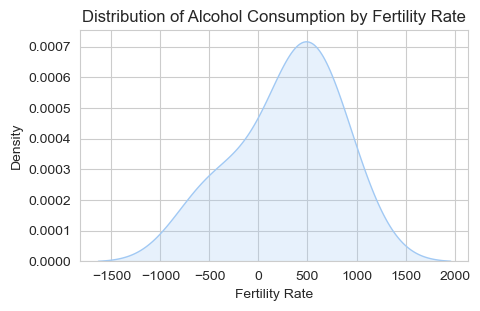

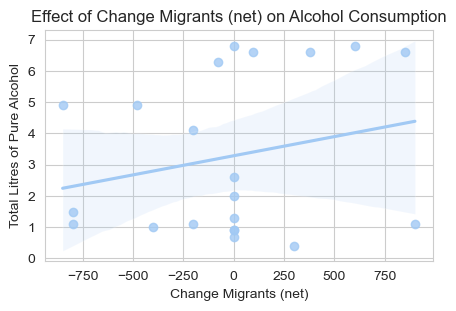

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = final_merged_df

# Plot KDE plot of alcohol consumption for all age groups combined
plt.figure(figsize=(5, 3))
sns.kdeplot(data=data, x='Change Yearly', fill=True, common_norm=False, palette='Set1')
plt.title('Distribution of Alcohol Consumption by Fertility Rate')
plt.xlabel('Fertility Rate')
plt.ylabel('Density')
plt.show()

# Create a regression plot
plt.figure(figsize=(5, 3))
sns.regplot(data=data, x='Change Migrants (net)', y='total_litres_of_pure_alcohol')
plt.title('Effect of Change Migrants (net) on Alcohol Consumption')
plt.xlabel('Change Migrants (net)')
plt.ylabel('Total Litres of Pure Alcohol')
plt.show()


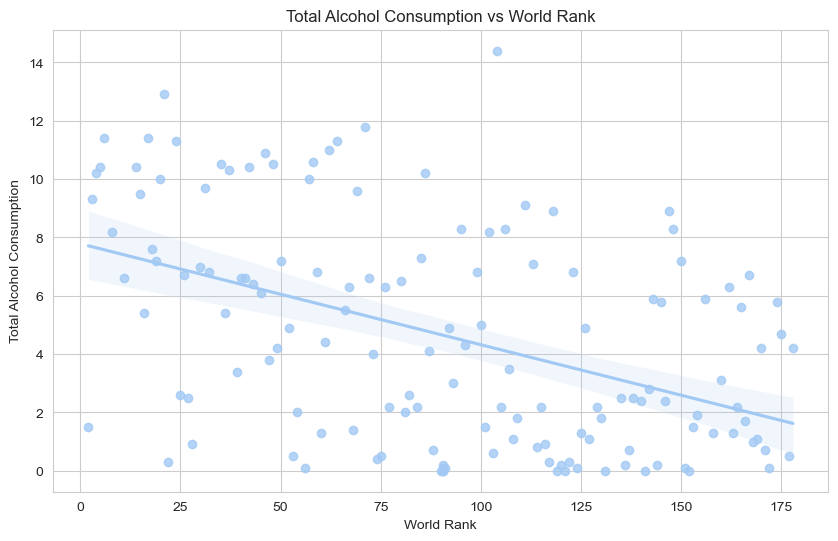

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the linear regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='World Rank', y='total_litres_of_pure_alcohol', data=final_merged_df)

# Add titles and labels
plt.title('Total Alcohol Consumption vs World Rank')
plt.xlabel('World Rank')
plt.ylabel('Total Alcohol Consumption')

# Show plot
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

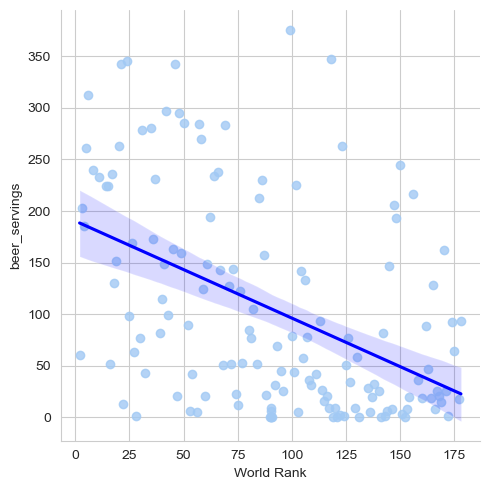

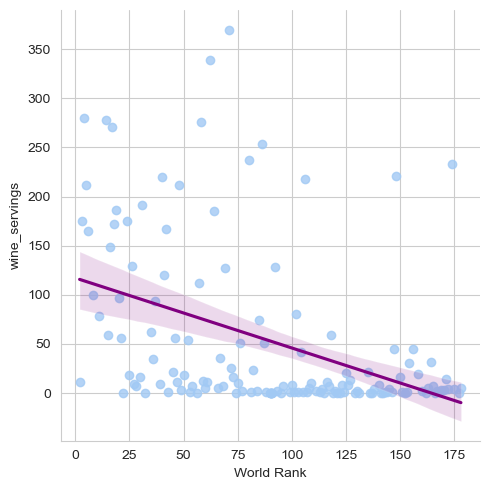

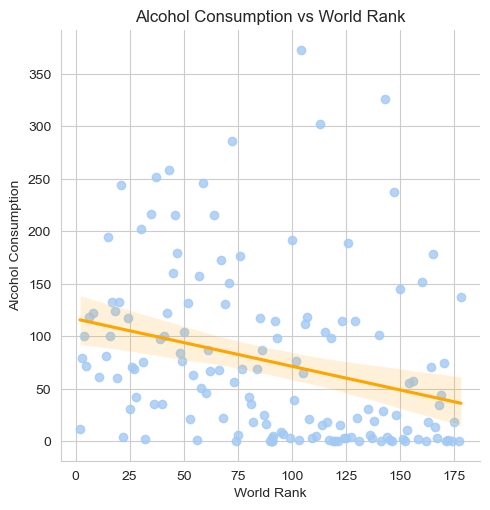

In [325]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the joint linear regression plots
plt.figure(figsize=(10, 6))
sns.lmplot(x='World Rank', y='beer_servings', data=final_merged_df, line_kws={'color': 'blue'})
sns.lmplot(x='World Rank', y='wine_servings', data=final_merged_df, line_kws={'color': 'purple'})
sns.lmplot(x='World Rank', y='spirit_servings', data=final_merged_df, line_kws={'color': 'orange'})

# Add titles and labels
plt.title('Alcohol Consumption vs World Rank')
plt.xlabel('World Rank')
plt.ylabel('Alcohol Consumption')

# Show plot
plt.grid(True)
plt.show()


In [344]:
# Define threshold for high alcohol consumption
threshold = 5.0  # Define your threshold value here

# Create binary target variable indicating high (1) or low (0) alcohol consumption
final_merged_df['Alcohol_Consumption_Category'] = final_merged_df['total_litres_of_pure_alcohol'].apply(lambda x: 'High' if x > threshold else 'Low')

# Print out the list of countries and their alcohol consumption categories
country_categories = final_merged_df[['Country', 'Alcohol_Consumption_Category']]
print(country_categories)


         Country Alcohol_Consumption_Category
0    Afghanistan                          Low
1        Albania                          Low
2        Algeria                          Low
3         Angola                         High
4      Argentina                         High
..           ...                          ...
139   Uzbekistan                          Low
140      Vanuatu                          Low
141        Yemen                          Low
142       Zambia                          Low
143     Zimbabwe                          Low

[144 rows x 2 columns]


In [374]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  # Replace 'path_to_world_shapefile.shp' with the actual file path

# Merge the country categories with the GeoPandas DataFrame
world_merged = world.merge(final_merged_df[['Country', 'Alcohol_Consumption_Category']], left_on='name', right_on='Country')

# Plot the data
plt.figure(figsize=(15, 10))
world_merged.plot(column='Alcohol_Consumption_Category', cmap='coolwarm', legend=True, legend_kwds={'loc': 'lower right'})
plt.title('Alcohol Consumption by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\shami\AppData\Local\Temp\ipykernel_27668\1548394790.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



KeyError: "['Alcohol_Consumption_Category'] not in index"

# Govenment Policies

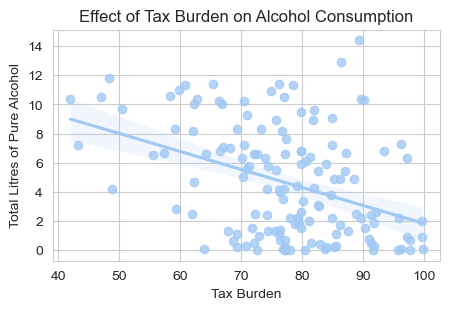

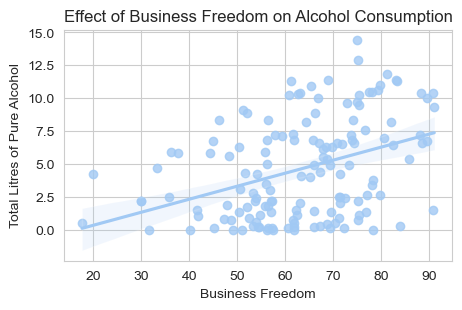

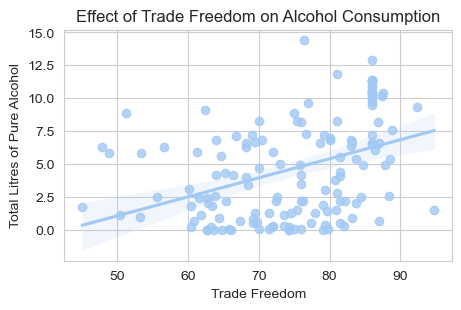

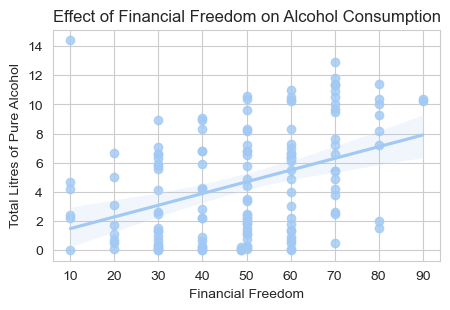

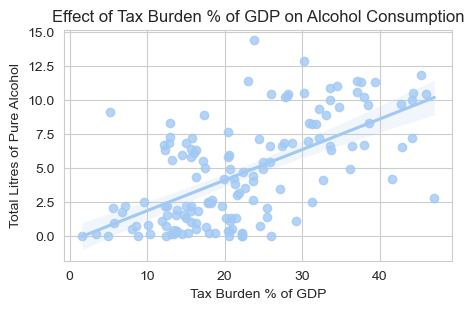

In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = final_merged_df

# List of factors
factors = ['Tax Burden', 'Business Freedom', 'Trade Freedom', 'Financial Freedom', 'Tax Burden % of GDP']

# Loop through each factor
for factor in factors:
    # Create a regression plot
    plt.figure(figsize=(5, 3))
    sns.regplot(data=data, x=factor, y='total_litres_of_pure_alcohol')
    plt.title(f'Effect of {factor} on Alcohol Consumption')
    plt.xlabel(factor)
    plt.ylabel('Total Litres of Pure Alcohol')
    plt.show()


# Regional Variances

In [228]:
pip install geopandas


     ---------------------------------------- 1.1/1.1 MB 3.4 MB/s eta 0:00:00
  Using cached fiona-1.9.6-cp310-cp310-win_amd64.whl (22.9 MB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)


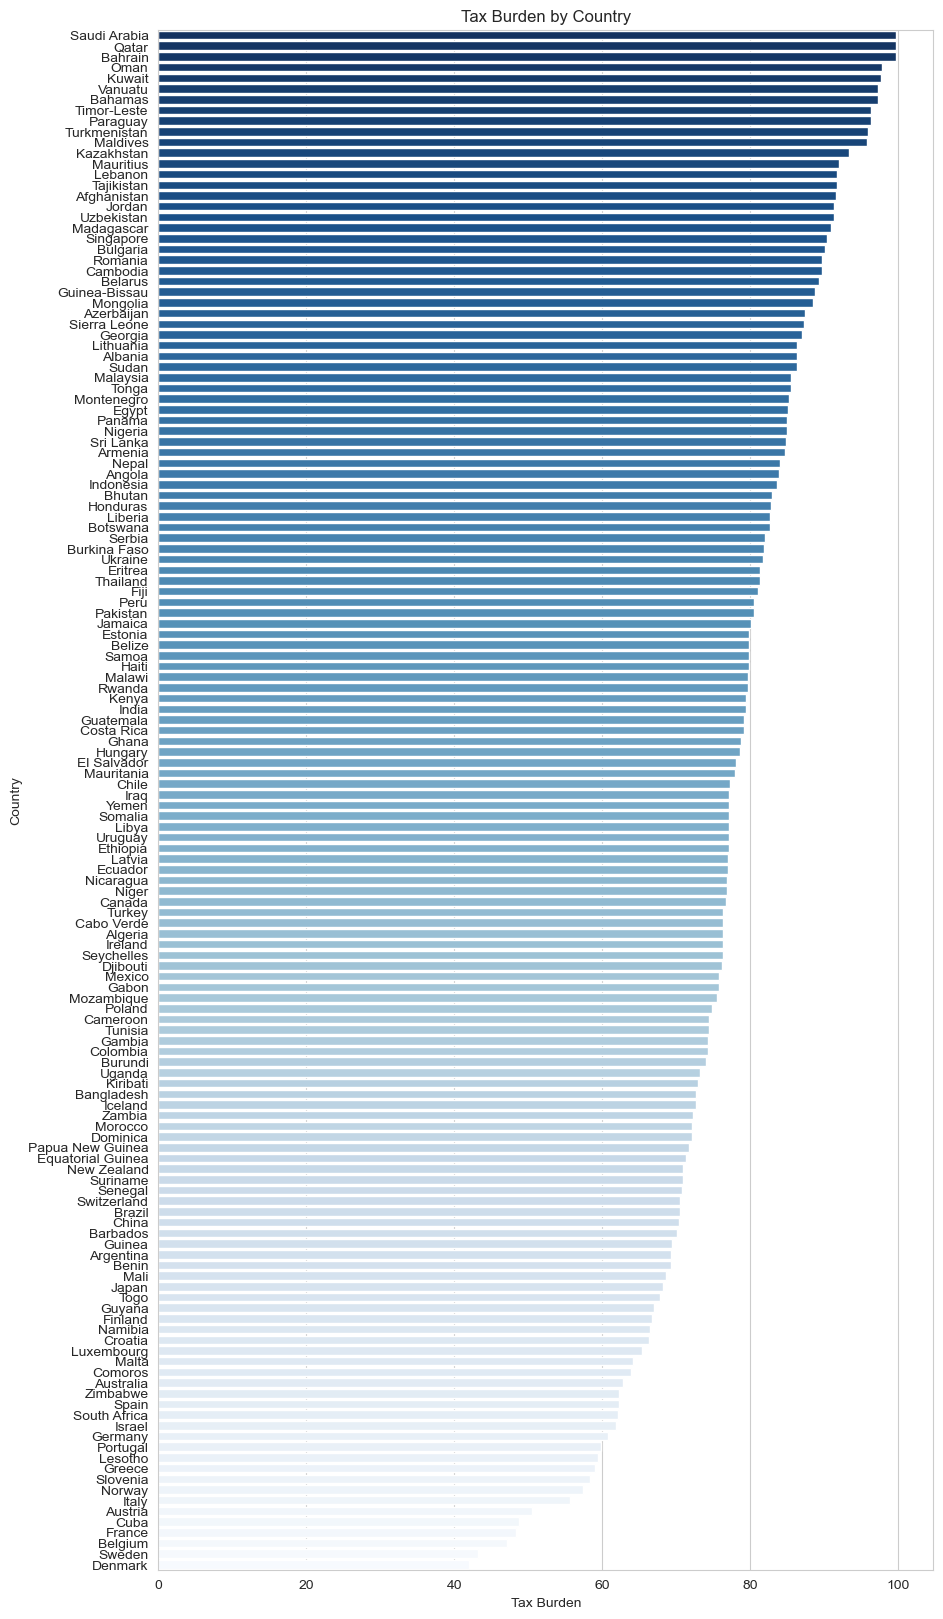

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by 'Tax Burden' in descending order
final_merged_df_sorted = final_merged_df.sort_values(by='Tax Burden', ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 20))
ax = sns.barplot(data=final_merged_df_sorted, y='Country', x='Tax Burden', palette='Blues_r')
plt.title('Tax Burden by Country')
plt.xlabel('Tax Burden')
plt.ylabel('Country')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the bar plot
plt.figure(figsize=(10, 20))
ax = sns.barplot(data=final_merged_df, y='Country', x='Tax Burden', palette='Blues_r')
plt.title('Tax Burden by Country')
plt.xlabel('Tax Burden')
plt.ylabel('Country')

plt.show()


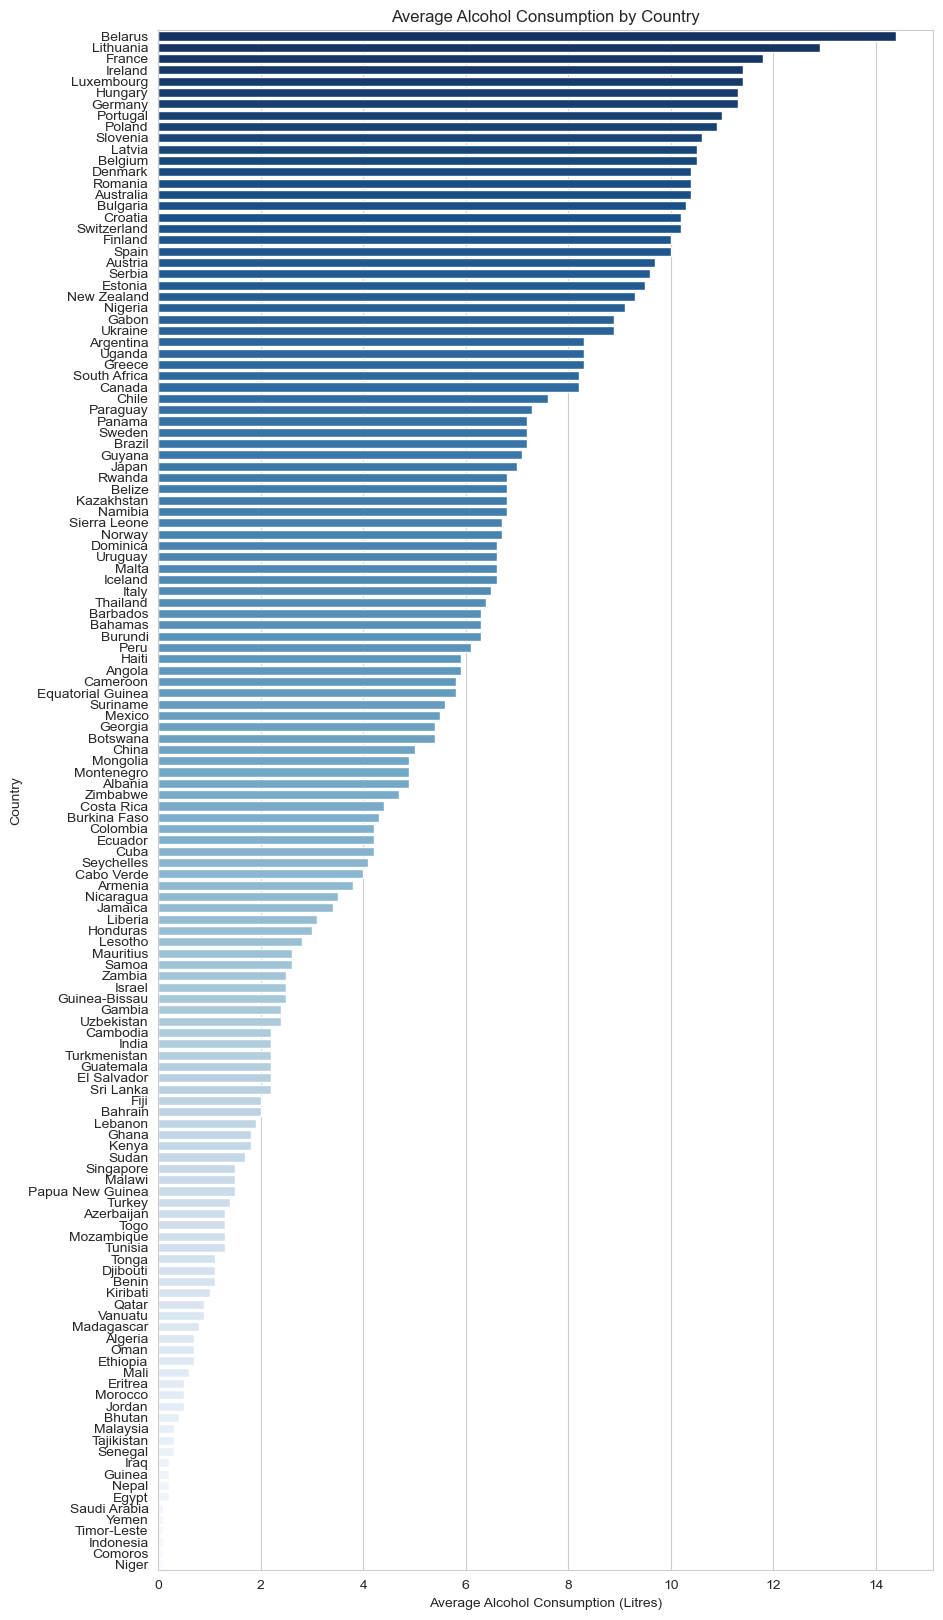

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter countries with alcohol consumption greater than 0
country_avg_filtered = country_avg[country_avg['total_litres_of_pure_alcohol'] > 0]

# Plot the bar plot
plt.figure(figsize=(10, 20))
ax = sns.barplot(data=country_avg_filtered, y='Country', x='total_litres_of_pure_alcohol', palette='Blues_r')
plt.title('Average Alcohol Consumption by Country')
plt.xlabel('Average Alcohol Consumption (Litres)')
plt.ylabel('Country')

# Save the plot as an image
plt.savefig('average_alcohol_consumption.png', bbox_inches='tight')  # Save as PNG format
plt.show()


In [376]:
# Sort the filtered data by alcohol consumption
country_avg_filtered_sorted = country_avg_filtered.sort_values(by='total_litres_of_pure_alcohol', ascending=False)

# Print the top 10 alcohol-consuming countries
print("Top 10 Alcohol-Consuming Countries:")
print(country_avg_filtered_sorted.head(10))

# Print the bottom 5 alcohol-consuming countries
print("\nBottom 5 Alcohol-Consuming Countries:")
print(country_avg_filtered_sorted.tail(5))


Top 10 Alcohol-Consuming Countries:
        Country  total_litres_of_pure_alcohol
13      Belarus                          14.4
79    Lithuania                          12.9
46       France                          11.8
64      Ireland                          11.4
80   Luxembourg                          11.4
59      Hungary                          11.3
50      Germany                          11.3
108    Portugal                          11.0
107      Poland                          10.9
119    Slovenia                          10.6

Bottom 5 Alcohol-Consuming Countries:
         Country  total_litres_of_pure_alcohol
141        Yemen                           0.1
130  Timor-Leste                           0.1
62     Indonesia                           0.1
30       Comoros                           0.1
98         Niger                           0.1


C:\Users\shami\AppData\Local\Temp\ipykernel_27668\3371493427.py:8: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

C:\Users\shami\AppData\Local\Temp\ipykernel_27668\3371493427.py:19: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


C:\Users\shami\AppData\Local\Temp\ipykernel_27668\3371493427.py:29: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




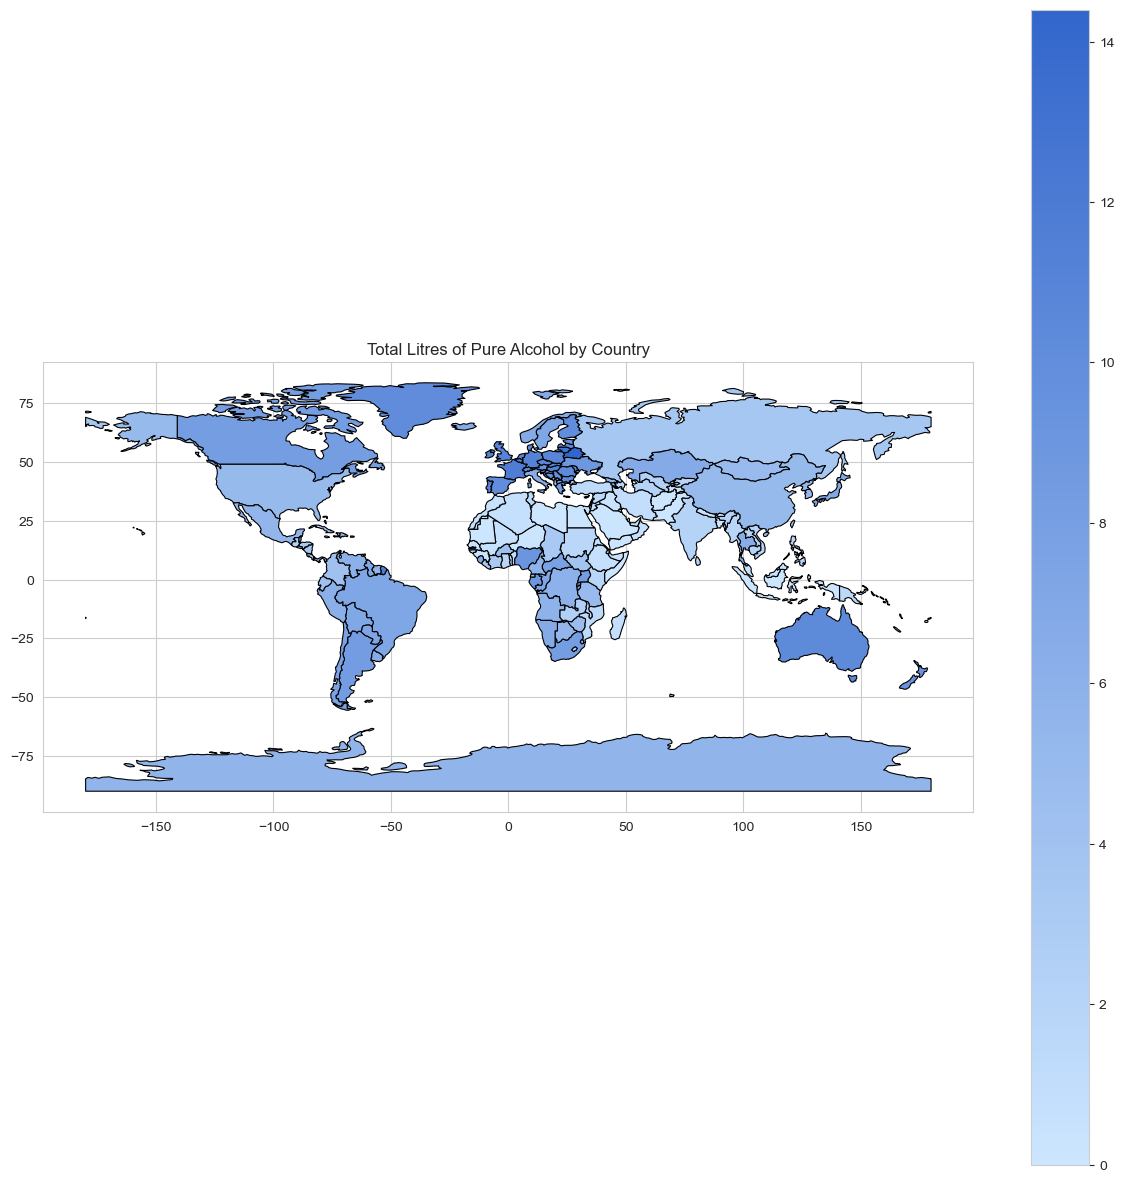

In [377]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the DataFrame containing alcohol consumption data
world = world.merge(final_merged_df, how='left', left_on='name', right_on='Country')

# Function to fill missing values with mean of neighboring countries
def fill_missing_with_neighbors(df, col_name):
    # Drop rows with missing values
    df_clean = df.dropna(subset=[col_name])
    
    # Extract coordinates of centroids
    X = np.array(df_clean.centroid.apply(lambda point: (point.x, point.y)).tolist())
    
    # Extract target values
    y = df_clean[col_name]
    
    # Fit KNN regressor
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X, y)
    
    # Predict missing values
    X_missing = np.array(df[df[col_name].isnull()].centroid.apply(lambda point: (point.x, point.y)).tolist())
    y_missing = knn.predict(X_missing)
    
    # Fill missing values
    df.loc[df[col_name].isnull(), col_name] = y_missing

# Fill missing values with mean of neighboring countries' alcohol consumption
fill_missing_with_neighbors(world, 'total_litres_of_pure_alcohol')

# External setting for USA
world.loc[world['name'] == 'United States', 'total_litres_of_pure_alcohol'] = 8.7

# Define the colors for the blue colormap
colors = [(0.8, 0.9, 1.0), (0.2, 0.4, 0.8)]  # Light blue, Dark blue

# Create the custom blue colormap
cmap = LinearSegmentedColormap.from_list('custom_blue', colors)

# Plot the choropleth map using the custom blue colormap and well-defined borders
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
world.plot(column='total_litres_of_pure_alcohol', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='black', legend=True)
plt.title('Total Litres of Pure Alcohol by Country')
plt.show()


C:\Users\shami\AppData\Local\Temp\ipykernel_27668\572014973.py:7: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



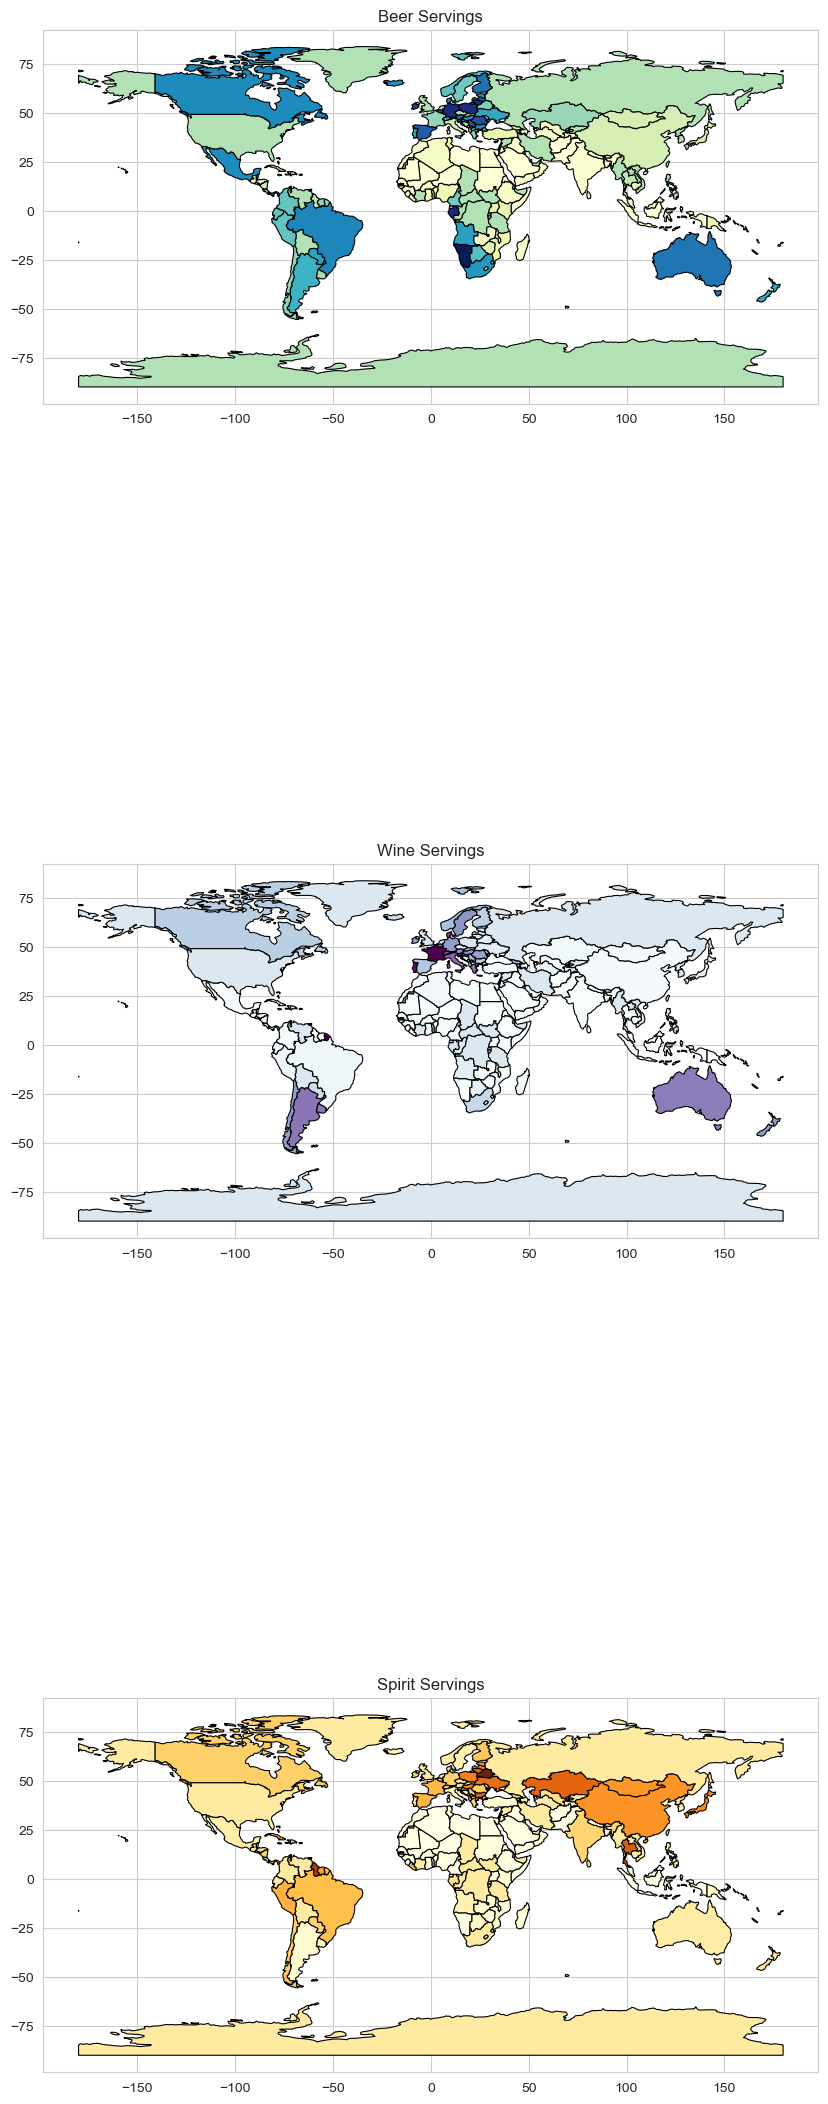

In [378]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the DataFrame containing alcohol consumption data
world = world.merge(final_merged_df, how='left', left_on='name', right_on='Country')

# Impute missing values using KNN
imputer = KNNImputer(n_neighbors=5)
world[['beer_servings', 'wine_servings', 'spirit_servings']] = imputer.fit_transform(world[['beer_servings', 'wine_servings', 'spirit_servings']])

# Create a figure and axis
fig, ax = plt.subplots(3, 1, figsize=(10, 30))  # Adjust figsize for larger plots

# Plot beer servings
world.plot(column='beer_servings', cmap='YlGnBu', linewidth=0.8, ax=ax[0], edgecolor='black', legend=False)
ax[0].set_title('Beer Servings')

# Plot wine servings
world.plot(column='wine_servings', cmap='BuPu', linewidth=0.8, ax=ax[1], edgecolor='black', legend=False)
ax[1].set_title('Wine Servings')

# Plot spirit servings
world.plot(column='spirit_servings', cmap='YlOrBr', linewidth=0.8, ax=ax[2], edgecolor='black', legend=False)
ax[2].set_title('Spirit Servings')

# Adjust layout
plt.subplots_adjust(hspace=0.3)  # Adjust vertical spacing

# Show plot
plt.show()


In [304]:
# Top 5 beer servings
top_beer_servings = final_merged_df.sort_values(by='beer_servings', ascending=False).head(5)
print("Top 5 Countries for Beer Servings:")
print(top_beer_servings[['Country', 'beer_servings']])

# Top 5 wine servings
top_wine_servings = final_merged_df.sort_values(by='wine_servings', ascending=False).head(5)
print("\nTop 5 Countries for Wine Servings:")
print(top_wine_servings[['Country', 'wine_servings']])

# Top 5 spirit servings
top_spirit_servings = final_merged_df.sort_values(by='spirit_servings', ascending=False).head(5)
print("\nTop 5 Countries for Spirit Servings:")
print(top_spirit_servings[['Country', 'spirit_servings']])


Top 5 Countries for Beer Servings:
       Country  beer_servings
94     Namibia          376.0
47       Gabon          347.0
50     Germany          346.0
107     Poland          343.0
79   Lithuania          343.0

Top 5 Countries for Wine Servings:
         Country  wine_servings
46        France          370.0
108     Portugal          339.0
127  Switzerland          280.0
34       Denmark          278.0
119     Slovenia          276.0

Top 5 Countries for Spirit Servings:
      Country  spirit_servings
13    Belarus            373.0
57      Haiti            326.0
56     Guyana            302.0
36   Dominica            286.0
129  Thailand            258.0


# Health Concerns

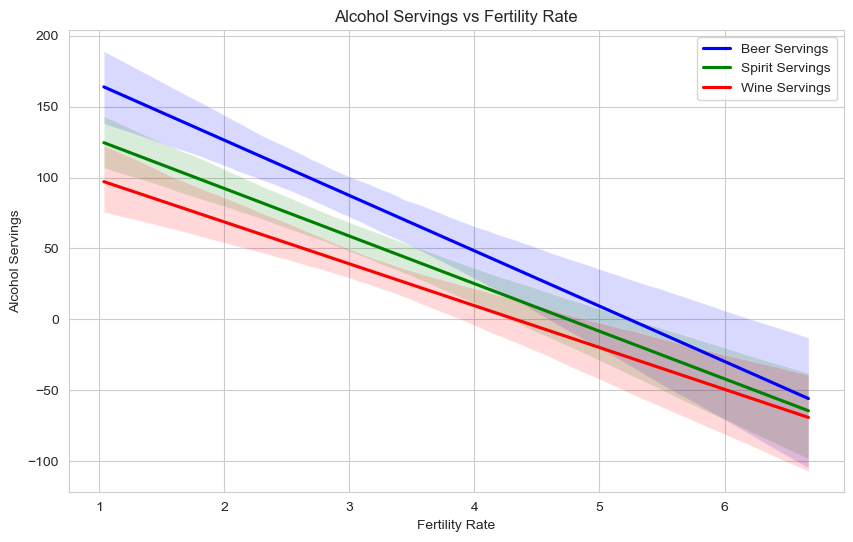

In [332]:
import seaborn as sns

# Create a single plot
plt.figure(figsize=(10, 6))

# Plot regression lines for beer servings vs fertility rate
beer_regplot = sns.regplot(x='Fertility Rate', y='beer_servings', data=final_merged_df, scatter=False, line_kws={'color': 'blue'}, label='Beer Servings')

# Plot regression lines for spirit servings vs fertility rate
spirit_regplot = sns.regplot(x='Fertility Rate', y='spirit_servings', data=final_merged_df, scatter=False, line_kws={'color': 'green'}, label='Spirit Servings')

# Plot regression lines for wine servings vs fertility rate
wine_regplot = sns.regplot(x='Fertility Rate', y='wine_servings', data=final_merged_df, scatter=False, line_kws={'color': 'red'}, label='Wine Servings')

# Add titles and labels
plt.title('Alcohol Servings vs Fertility Rate')
plt.xlabel('Fertility Rate')
plt.ylabel('Alcohol Servings')

# Add legend
plt.legend()



# Show plot
plt.grid(True)
plt.show()


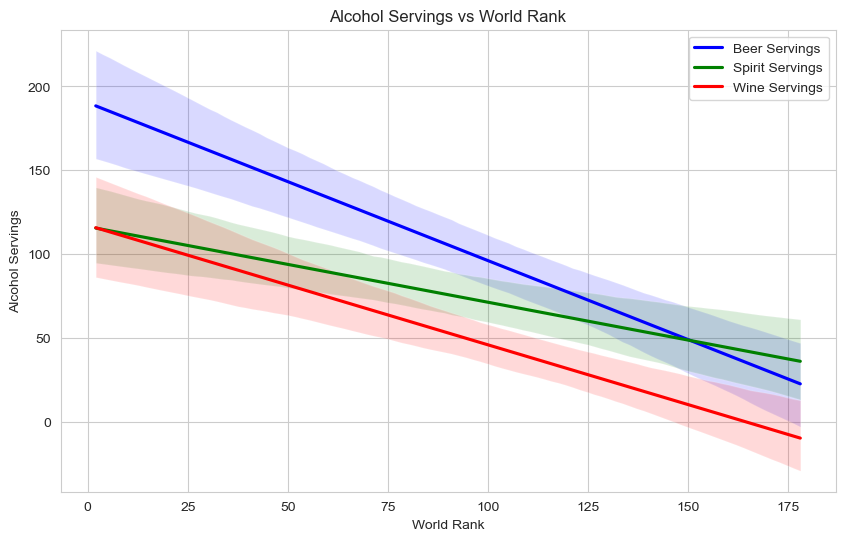

In [333]:
import seaborn as sns

# Create a single plot
plt.figure(figsize=(10, 6))

# Plot regression lines for beer servings vs world rank
beer_regplot = sns.regplot(x='World Rank', y='beer_servings', data=final_merged_df, scatter=False, line_kws={'color': 'blue'}, label='Beer Servings')

# Plot regression lines for spirit servings vs world rank
spirit_regplot = sns.regplot(x='World Rank', y='spirit_servings', data=final_merged_df, scatter=False, line_kws={'color': 'green'}, label='Spirit Servings')

# Plot regression lines for wine servings vs world rank
wine_regplot = sns.regplot(x='World Rank', y='wine_servings', data=final_merged_df, scatter=False, line_kws={'color': 'red'}, label='Wine Servings')



# Add titles and labels
plt.title('Alcohol Servings vs World Rank')
plt.xlabel('World Rank')
plt.ylabel('Alcohol Servings')

# Add legend
plt.legend()

# Add annotations for slopes
beer_coeff = beer_regplot.get_lines()[0].get_data()
spirit_coeff = spirit_regplot.get_lines()[0].get_data()
wine_coeff = wine_regplot.get_lines()[0].get_data()


# Show plot
plt.grid(True)
plt.show()


C:\Users\shami\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\shami\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\shami\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\shami\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\shami\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

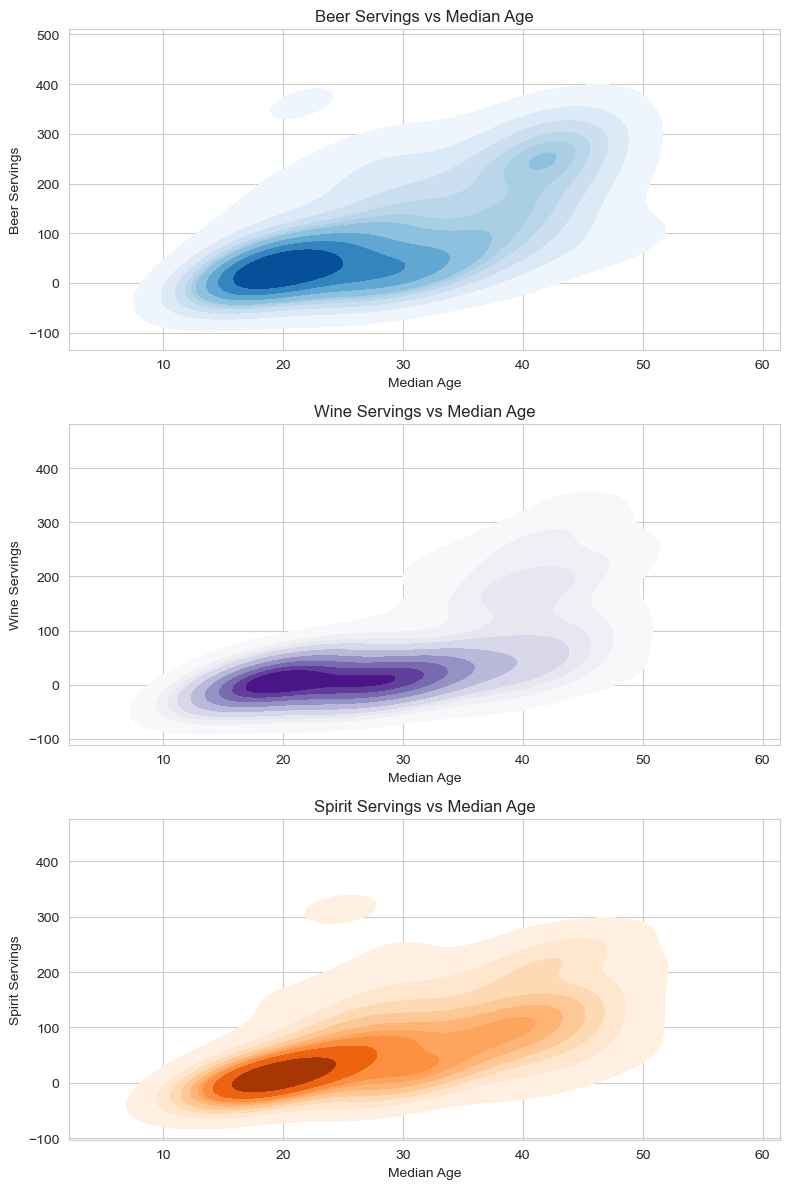

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# KDE plot for Beer Servings vs Median Age
sns.kdeplot(data=final_merged_df, x='Median Age', y='beer_servings', ax=axes[0], cmap='Blues', fill=True)
axes[0].set_title('Beer Servings vs Median Age')
axes[0].set_xlabel('Median Age')
axes[0].set_ylabel('Beer Servings')

# KDE plot for Wine Servings vs Median Age
sns.kdeplot(data=final_merged_df, x='Median Age', y='wine_servings', ax=axes[1], cmap='Purples', fill=True)
axes[1].set_title('Wine Servings vs Median Age')
axes[1].set_xlabel('Median Age')
axes[1].set_ylabel('Wine Servings')

# KDE plot for Spirit Servings vs Median Age
sns.kdeplot(data=final_merged_df, x='Median Age', y='spirit_servings', ax=axes[2], cmap='Oranges', fill=True)
axes[2].set_title('Spirit Servings vs Median Age')
axes[2].set_xlabel('Median Age')
axes[2].set_ylabel('Spirit Servings')

# Adjust layout
plt.tight_layout()

# Save the image
plt.savefig('alcohol_servings_vs_median_age.png')

# Show plots
plt.show()


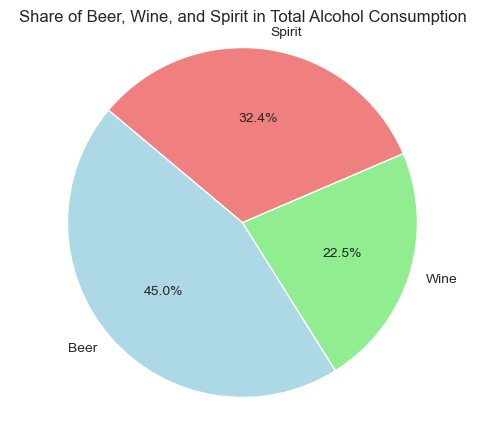

In [313]:
import matplotlib.pyplot as plt

# Calculate the total alcohol consumption
total_alcohol = final_merged_df['beer_servings'].sum() + final_merged_df['wine_servings'].sum() + final_merged_df['spirit_servings'].sum()

# Calculate the share of beer, wine, and spirit in the total alcohol consumption
beer_share = final_merged_df['beer_servings'].sum() / total_alcohol
wine_share = final_merged_df['wine_servings'].sum() / total_alcohol
spirit_share = final_merged_df['spirit_servings'].sum() / total_alcohol

# Create labels and sizes for the pie chart
labels = ['Beer', 'Wine', 'Spirit']
sizes = [beer_share, wine_share, spirit_share]
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a pie chart
plt.figure(figsize=(6, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Share of Beer, Wine, and Spirit in Total Alcohol Consumption')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


In [ ]:
Polynomial vs Multiple linear Regression on X vs y

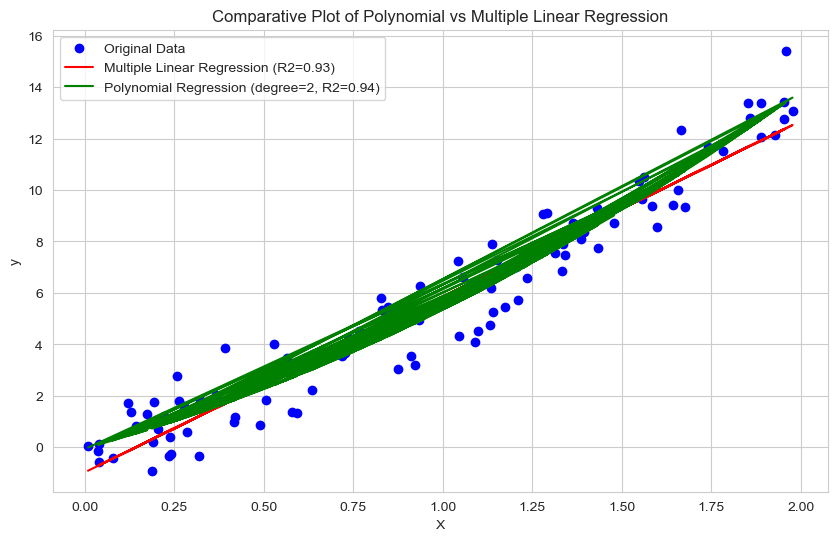

In [383]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Generate some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)  # Independent variable
y = 3 * X + 2 * X**2 + np.random.randn(100, 1)  # Dependent variable with polynomial relationship

# Fit multiple linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X, y)
linear_r2 = r2_score(y, linear_reg.predict(X))

# Fit polynomial regression model
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
poly_r2 = r2_score(y, poly_reg.predict(X_poly))

# Plotting
plt.figure(figsize=(10, 6))

# Plot original data
plt.scatter(X, y, color='blue', label='Original Data')

# Plot multiple linear regression line
plt.plot(X, linear_reg.predict(X), color='red', label=f'Multiple Linear Regression (R2={linear_r2:.2f})')

# Plot polynomial regression line
plt.plot(X, poly_reg.predict(X_poly), color='green', label=f'Polynomial Regression (degree=2, R2={poly_r2:.2f})')

# Labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparative Plot of Polynomial vs Multiple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()
